<a href="https://colab.research.google.com/github/alexmal2804/hwds/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1DT_wHsOol2C-iyH0GsO3A6xBrfFRQfqY?usp=sharing

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

In [554]:
# Импорт необходимых для работы модулей
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Импортируем DataSet и проведем его предварительный анализ

In [555]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [556]:
 # Импортируем в DataFrame
 df = pd.read_csv('/content/drive/MyDrive/my_databases/ThoraricSurgery.csv')

In [557]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [558]:
# Дропнем индексы и поле ID
df = df.reset_index()
df = df.drop(columns=['id', 'index'])

In [559]:
# Определим размер DataFrame
df.shape

(470, 17)

In [560]:
# Проверим на пропуски в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


Пропусков нет

In [561]:
# Выведем описательную статистику
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


Проверим столбец PRE5 на выбросы

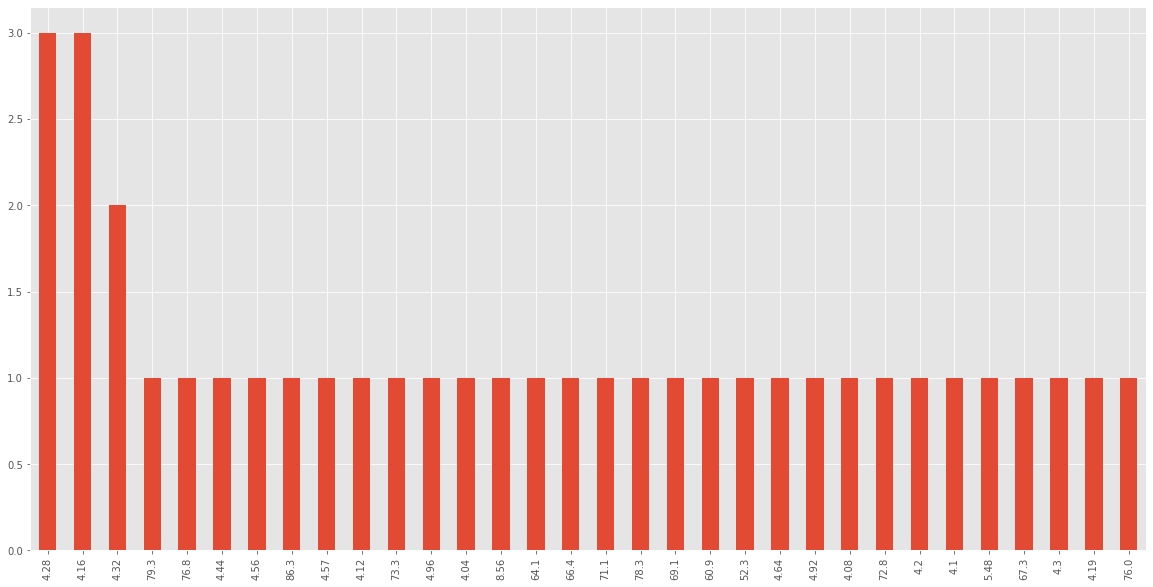

In [562]:
# Проверка столбца на выбросы
df[df['PRE5'] > 4]['PRE5'].value_counts().plot.bar(figsize=(20,10))

Будем считать выбросами те значения, где объем выдыхаемого воздуха более  $4,32$. Заменим выбросы средними значениями, подсчитанными без учета этих выбросов.

In [563]:
# Замена выбросов средними значениями
mean = df['PRE5'][df['PRE5'] < 6].mean()
df['PRE5'][df['PRE5'] > 6] = mean

##Осуществим предобработку данных

Преобразуем категориальные признаки в числовые

In [564]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Используем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(input_df):
    result = input_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

In [565]:
# Применим функцию кодирования для исследуемого датасета
df_encoded, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
df_encoded.head() 

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [566]:
encoders

{'DGN': LabelEncoder(),
 'PRE10': LabelEncoder(),
 'PRE11': LabelEncoder(),
 'PRE14': LabelEncoder(),
 'PRE17': LabelEncoder(),
 'PRE19': LabelEncoder(),
 'PRE25': LabelEncoder(),
 'PRE30': LabelEncoder(),
 'PRE32': LabelEncoder(),
 'PRE6': LabelEncoder(),
 'PRE7': LabelEncoder(),
 'PRE8': LabelEncoder(),
 'PRE9': LabelEncoder(),
 'Risk1Yr': LabelEncoder()}

In [567]:
# Выведем соответствие числовых данных закодированным
for column in df.columns:
  if df.dtypes[column] == np.object:
    nunique = sorted(pd.unique(df_encoded[column]).tolist())
    print(f'{column} - {encoders[column].inverse_transform(nunique)} - {encoders[column].fit_transform(nunique)}')
    print(nunique)

DGN - ['DGN1' 'DGN2' 'DGN3' 'DGN4' 'DGN5' 'DGN6' 'DGN8'] - [0 1 2 3 4 5 6]
[0, 1, 2, 3, 4, 5, 6]
PRE6 - ['PRZ0' 'PRZ1' 'PRZ2'] - [0 1 2]
[0, 1, 2]
PRE7 - ['F' 'T'] - [0 1]
[0, 1]
PRE8 - ['F' 'T'] - [0 1]
[0, 1]
PRE9 - ['F' 'T'] - [0 1]
[0, 1]
PRE10 - ['F' 'T'] - [0 1]
[0, 1]
PRE11 - ['F' 'T'] - [0 1]
[0, 1]
PRE14 - ['OC11' 'OC12' 'OC13' 'OC14'] - [0 1 2 3]
[0, 1, 2, 3]
PRE17 - ['F' 'T'] - [0 1]
[0, 1]
PRE19 - ['F' 'T'] - [0 1]
[0, 1]
PRE25 - ['F' 'T'] - [0 1]
[0, 1]
PRE30 - ['F' 'T'] - [0 1]
[0, 1]
PRE32 - ['F' 'T'] - [0 1]
[0, 1]
Risk1Yr - ['F' 'T'] - [0 1]
[0, 1]


In [568]:
# перемешка
df_encoded = df_encoded.sample(frac=1).reset_index(drop=True)

Построим тепловую карту корреляции признаков

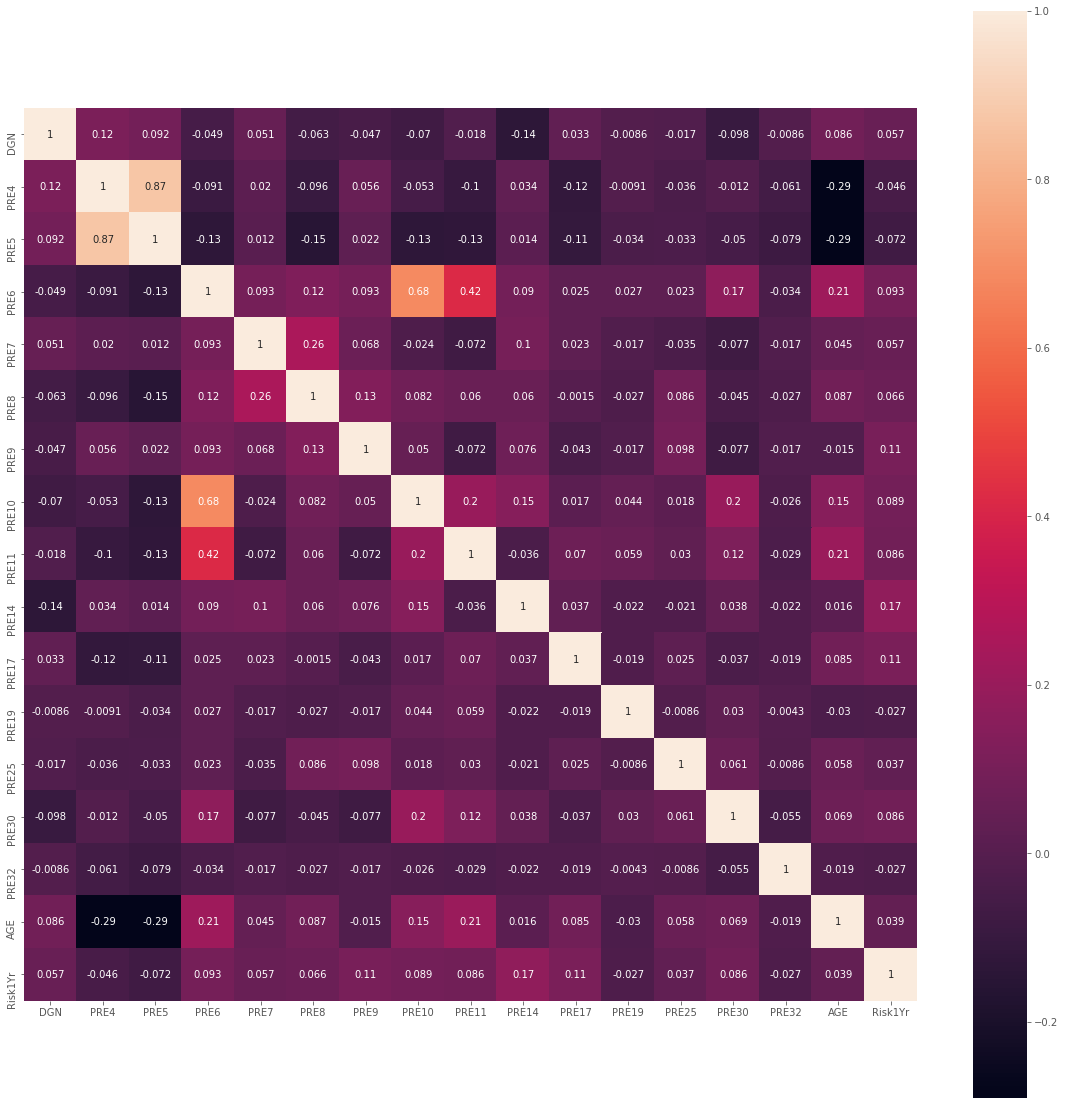

In [569]:
# Строим тепловую карту
plt.subplots(figsize=(20,20))
df_encoded, encoders = number_encode_features(df)
sns.heatmap(df_encoded.corr(), square=True, annot=True)
plt.show()

Т.к. в датасете нет признаков с коэф. корреляции Пирсона равном 1, то оставляем для анализа на первом этапе все имеющиеся признаки

Построим распределение величин по признакам для всего DataSet

In [570]:
# График распределения величин по признакам
def ditstrib_features(df, cols=5, a = 5, b = 5, rot = "vertical", s = ""):
  fig = plt.figure(figsize=(a,b))
  input_df = pd.DataFrame(df)
  rows = np.ceil(float(input_df.shape[1]) / cols)
  for i, column in enumerate(input_df.columns):
      ax = fig.add_subplot(rows, cols, i + 1)
      ax.set_title(column + " " + str(s))
      input_df[column].hist(axes=ax)
      plt.xticks(rotation=rot)
  plt.subplots_adjust(hspace=0.5, wspace=0.2)

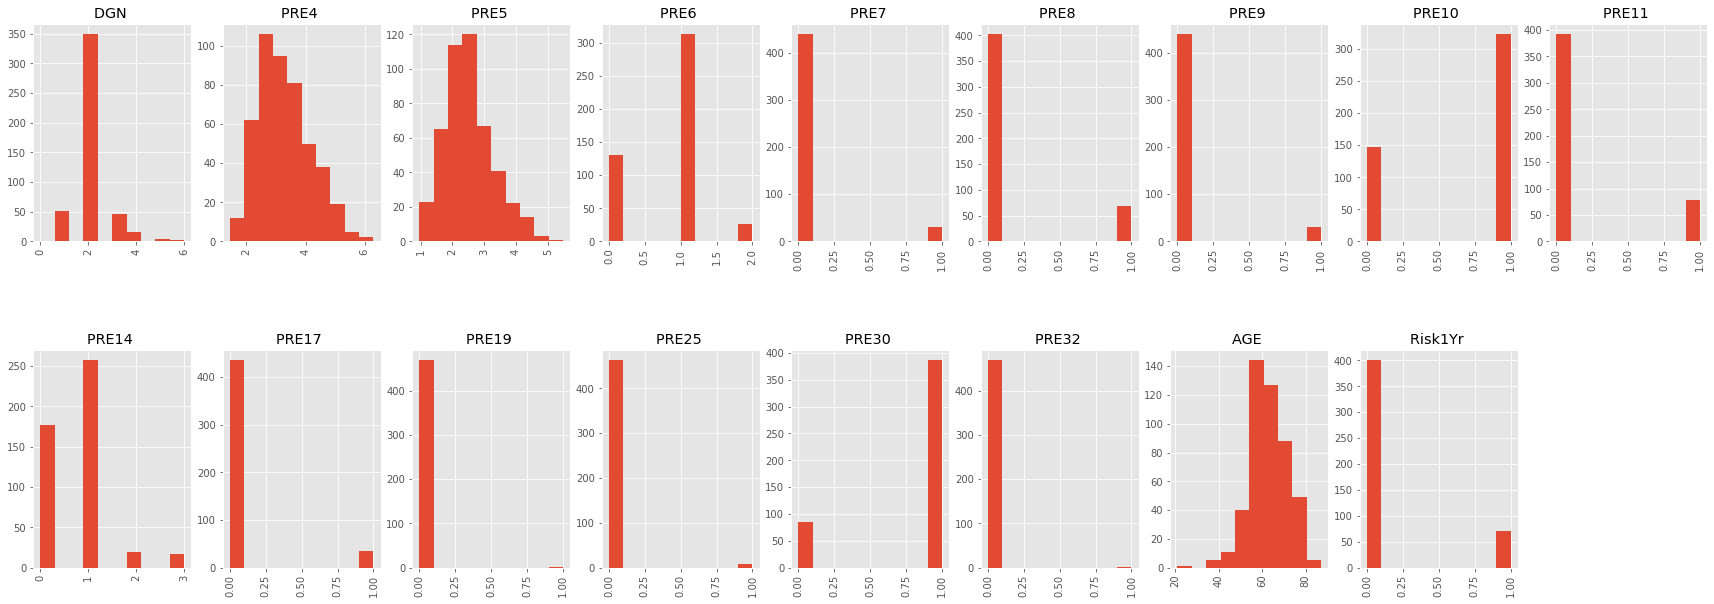

In [571]:
# строим распределение по всем данным из DataSet
ditstrib_features(df_encoded, 9, 30, 10)

Распределение величин числовых признаков не является строго нормальным

Исследуем данные в целевой функции на сбалансированность

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: DGN, dtype: int64


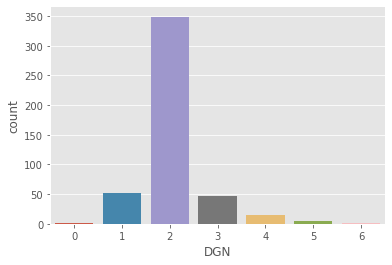

In [572]:
sns.countplot(x='DGN', data=df_encoded)
print(df_encoded['DGN'].value_counts())

In [573]:
# Построим распределение признаков в каждом классе
# nunique = sorted(pd.unique(df_encoded['DGN']).tolist())
# print(df_encoded['DGN'].value_counts())
# for i in nunique:
#  ditstrib_features(df_encoded[df_encoded['DGN']  == i ],  a=20, b=10, s=i)

##Используем взвешенную логистическу регрессию для исследования данных

In [574]:
# Выделим целевую функцию в отдельную переменную
y = np.array(df_encoded['DGN'])

In [575]:
# Преобразуем DataFrame в формат для обучения модели (np.array)
df_encoded_1 = df_encoded.drop(columns='DGN')
X = np.array(df_encoded_1)
# Масштабируем признаки
from sklearn.preprocessing import scale
X_norm = scale(X)
X_norm

array([[-0.46140527, -0.46946931,  0.4097736 , ..., -0.06537205,
        -0.29134848, -0.41833001],
       [ 0.13597486, -0.83882885, -1.46006711, ..., -0.06537205,
        -1.32611263, -0.41833001],
       [-0.59926222, -0.57500061,  0.4097736 , ..., -0.06537205,
        -0.40632228, -0.41833001],
       ...,
       [-0.277596  , -0.57500061,  0.4097736 , ..., -0.06537205,
        -1.21113883, -0.41833001],
       [-1.51830858, -1.10265709,  0.4097736 , ..., -0.06537205,
         1.89315359, -0.41833001],
       [ 1.65240135,  1.37732838, -1.46006711, ..., -0.06537205,
        -1.32611263, -0.41833001]])

In [576]:
# Разобъем выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

In [577]:
# Импортируем необходимые модули
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [578]:
# Используем функцию построения графика точности и их стандартного отклонения
def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    

In [579]:
# Выделим создание, обучение и тестирование модели 
# логистической регрессии с балансировкой в отдельную процедуру
def lg_balanced_model(X_train, y_train, X_test, y_test):
  # Зададим сетку - среди каких значений выбирать наилучший параметр.
  param_grid = {'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 100]}
  # Тип оценки
  estimator_lb = LogisticRegression(class_weight='balanced')
  # Создаем объект для обучения
  gs_logistic_balanced = RandomizedSearchCV(estimator_lb, param_grid)
  # Обучаем его
  gs_logistic_balanced.fit(X_train, y_train)
  print('Лучшие рейтинги по результатам обучения:')
  # Отобразим результаты обучения
  print(gs_logistic_balanced.best_score_)
  print(gs_logistic_balanced.best_params_)
  print(gs_logistic_balanced.best_estimator_)
  # Строим график оценки точности и стандартного отклонения
  print('График оценки точности и стандартного отклонения:')
  plot_scores(gs_logistic_balanced)
  # Выполним предсказание на тестовом наборе данных 
  preds_logistic_balanced = gs_logistic_balanced.predict(X_test)
  # Используем classification_report
  print('Classification_report:')
  print(metrics.classification_report(y_test, preds_logistic_balanced))
  # Используем метрику accuracy
  print('Accuracy:')
  print(metrics.accuracy_score(y_test, preds_logistic_balanced))

Лучшие рейтинги по результатам обучения:
0.37604430379746834
{'C': 5}
LogisticRegression(C=5, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
График оценки точности и стандартного отклонения:


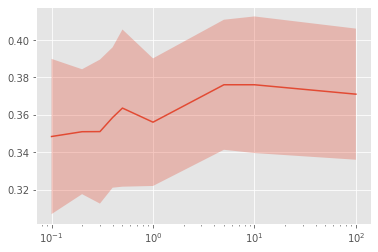

Classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.20      0.43      0.27         7
           2       0.70      0.29      0.41        55
           3       0.08      0.20      0.12         5
           4       0.09      0.33      0.14         3
           5       0.00      0.00      0.00         0
           6       0.50      1.00      0.67         1

    accuracy                           0.31        71
   macro avg       0.22      0.32      0.23        71
weighted avg       0.58      0.31      0.37        71

Accuracy:
0.30985915492957744


In [580]:
# Проведем создание, обучение и тестирование модели 
lg_balanced_model(X_train, y_train, X_test, y_test)

## Используем KNN


Данные несбалансированы, поэтому будем использовать для их балансировки метод RandomOverSampler, который  использует oversampling 


In [581]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

# Выделим создание, обучение и тестирование модели 
# KNN с oversampling в отдельную процедуру
def knn_smote_model(X_train, y_train, X_test, y_test):
  sm = RandomOverSampler(random_state = 42)
  # Осуществляем oversampling с использованием RandomOverSampler
  X_sm, y_sm = sm.fit_resample(X_train, y_train)
  # Будем использовать модель k ближайших соседей
  knn = KNeighborsClassifier()
  # Зададим сетку - среди каких значений выбирать наилучший параметр.
  knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')} # перебираем по параметру <<n_neighbors>> по сетке 
  # Создаем объект кросс-валидации
  gs = RandomizedSearchCV(knn, knn_grid)
  # Обучаем его
  gs.fit(X_sm, y_sm)
  # best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
  print(gs.best_params_, gs.best_score_)
  # Создаем классификатор на лучшем количестве ближайших соседей
  knn = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors']) 
  # тренируем для knn
  clf_knn = knn.fit(X_sm, y_sm)
  # получаем предсказание на тестовых данных
  y_knn = clf_knn.predict(X_test)
  # Для оценки точности модели используем метрику classification report
  print('Classification_report:')
  print(metrics.classification_report(y_test, y_knn))
  # Используем метрику accuracy
  print('Accuracy:')
  print(metrics.accuracy_score(y_test, y_knn))

In [582]:
# Проведем создание, обучение и тестирование модели 
knn_smote_model(X_train, y_train, X_test, y_test)

{'n_neighbors': 18} 0.8056457137457775
Classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.29      0.17         7
           2       0.83      0.27      0.41        55
           3       0.09      0.40      0.15         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.27        71
   macro avg       0.15      0.14      0.10        71
weighted avg       0.66      0.27      0.35        71

Accuracy:
0.2676056338028169


## Используем SVM


## Дополнительно изменим кол-во признаков в модели с целью получить лучший результат
Т.к. признак PRE5 заметно коррелирует с PRE4  - удалим его из набора данных для исследования и повторно исследуем данные с использованием модели сбалансированной логистической регрессии 

In [583]:
from sklearn.svm import SVC

# Выделим создание, обучение и тестирование модели 
# SVC в отдельную процедуру
def svc_model(X_train, y_train, X_test, y_test):
  sm = RandomOverSampler(random_state = 42)
  # Осуществляем oversampling с использованием RandomOverSampler
  X_sm, y_sm = sm.fit_resample(X_train, y_train)
  # Зададим сетку - среди каких значений выбирать наилучший параметр.
  param_grid = {'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 100]}
  # Тип оценки
  svc_template = SVC(kernel='poly', degree=2)
  # Создаем объект для обучения
  svc = RandomizedSearchCV(svc_template, param_grid)
  # Обучаем его
  svc.fit(X_sm, y_sm)
  print('Лучшие рейтинги по результатам обучения:')
  # Отобразим результаты обучения
  print(svc.best_score_)
  print(svc.best_params_)
  print(svc.best_estimator_)
  # Строим график оценки точности и стандартного отклонения
  print('График оценки точности и стандартного отклонения:')
  plot_scores(svc)
  # Выполним предсказание на тестовом наборе данных 
  preds_svc = svc.predict(X_test)
  # Используем classification_report
  print('Classification_report:')
  print(metrics.classification_report(y_test, preds_svc))
  # Используем метрику accuracy
  print('Accuracy:')
  print(metrics.accuracy_score(y_test, preds_svc))

Лучшие рейтинги по результатам обучения:
0.9057366593437743
{'C': 100}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
График оценки точности и стандартного отклонения:


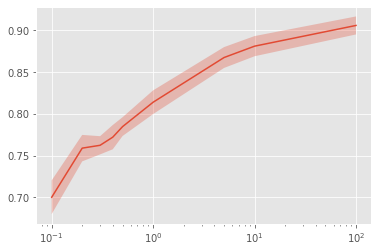

Classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.24      0.57      0.33         7
           2       0.78      0.45      0.57        55
           3       0.19      0.60      0.29         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.45        71
   macro avg       0.17      0.23      0.17        71
weighted avg       0.64      0.45      0.50        71

Accuracy:
0.4507042253521127


In [584]:
# Проведем создание, обучение и тестирование модели 
svc_model(X_train, y_train, X_test, y_test)

**На модели SVC с полиноминальными коэффициентами удалось достичь немного лучших результатов, чем на LR и KNN**

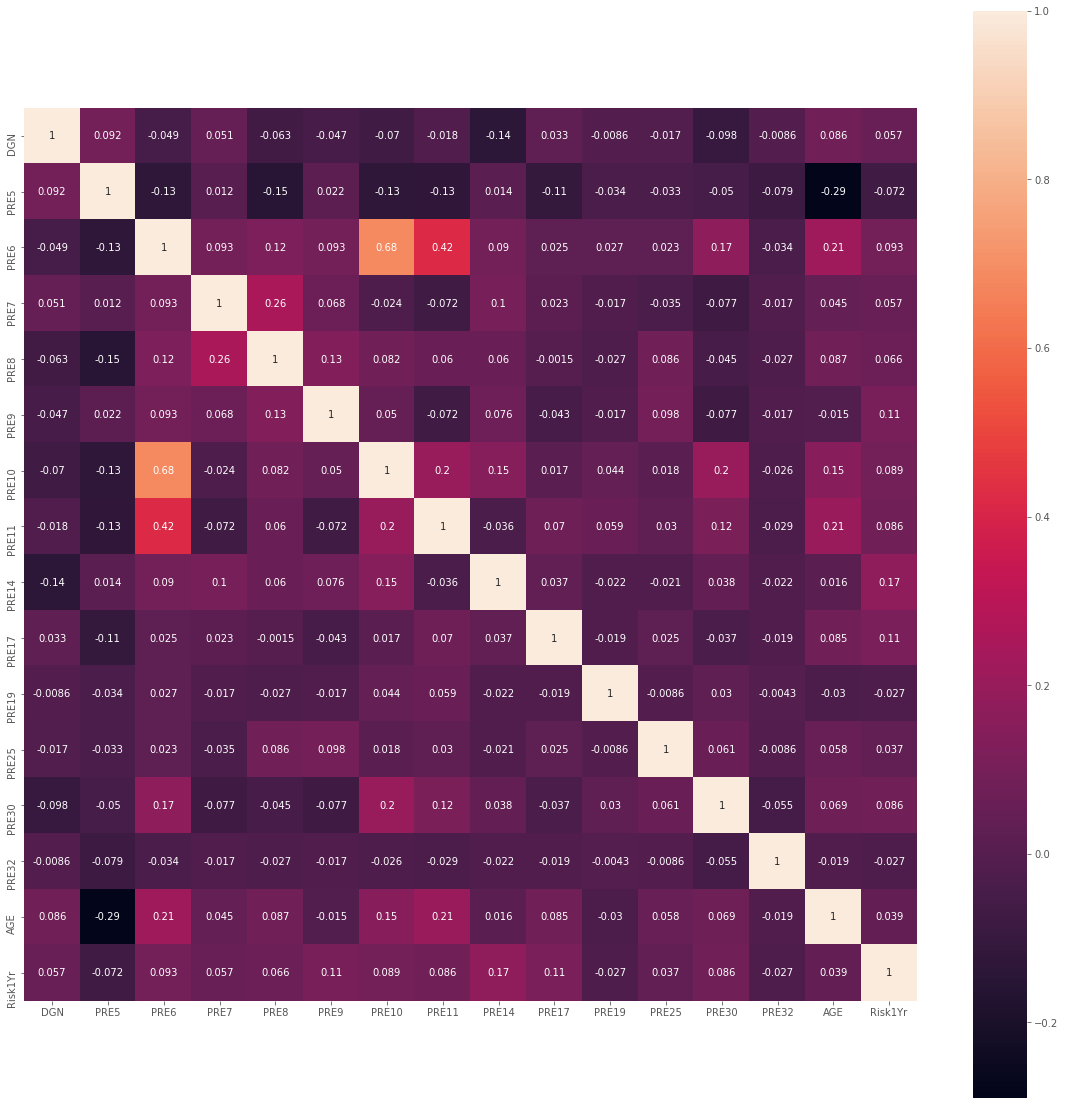

In [585]:
# Удалим PRE4
df_encoded_2 = df_encoded.drop(columns=['PRE4'])
# Построим тепловую карту
plt.subplots(figsize=(20,20))
sns.heatmap(df_encoded_2.corr(), square=True, annot=True)
plt.show()

In [586]:
# Преобразуем  DataFrame в формат для обучения модели (np.array)
df_encoded_2 = df_encoded_2.drop(columns='DGN')
X = np.array(df_encoded_2)
# Масштабируем признаки
from sklearn.preprocessing import scale
X_norm = scale(X)
X_norm
# Разобъем выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

Лучшие рейтинги по результатам обучения:
0.36851265822784807
{'C': 100}
LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
График оценки точности и стандартного отклонения:


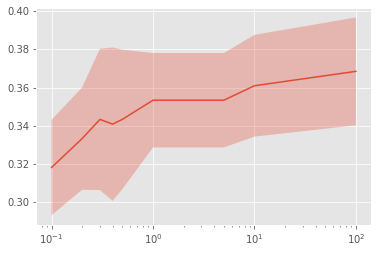

Classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.43      0.29         7
           2       0.73      0.29      0.42        55
           3       0.08      0.20      0.12         5
           4       0.10      0.33      0.15         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.30        71
   macro avg       0.16      0.18      0.14        71
weighted avg       0.59      0.30      0.36        71

Accuracy:
0.29577464788732394


In [587]:
# Проведем создание, обучение и тестирование модели взвешенной логистической регрессии
lg_balanced_model(X_train, y_train, X_test, y_test)

На взвешенной логистической регрессии результат улучшить не удалось

In [588]:
# Проведем создание, обучение и тестирование модели на knn с RandomOverSampler
knn_smote_model(X_train, y_train, X_test, y_test)

{'n_neighbors': 20} 0.8032161670564335
Classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.11      0.29      0.15         7
           2       0.74      0.25      0.38        55
           3       0.05      0.20      0.08         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.24        71
   macro avg       0.13      0.11      0.09        71
weighted avg       0.58      0.24      0.31        71

Accuracy:
0.23943661971830985


На KNN не удалось достичь  улучшения метрик

Лучшие рейтинги по результатам обучения:
0.8969952519311175
{'C': 100}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
График оценки точности и стандартного отклонения:


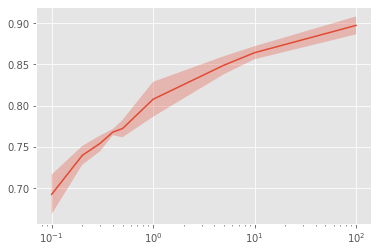

Classification_report:
              precision    recall  f1-score   support

           1       0.20      0.57      0.30         7
           2       0.83      0.44      0.57        55
           3       0.20      0.60      0.30         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.44        71
   macro avg       0.20      0.27      0.19        71
weighted avg       0.67      0.44      0.49        71

Accuracy:
0.43661971830985913


In [589]:
# Проведем создание, обучение и тестирование модели на SVC c kernel = 'poly' (полиноминальные коэффициенты)
svc_model(X_train, y_train, X_test, y_test)

На  svc также результат не улучшился

## Изменение числа групп в исследуемом наборе данных

Т.к. приемлемых результатов на исходном количестве групп не получилось - объединим группы, для которых кол-во строк небольшое (менее 40). Объединим эти редко встречающиеся случаи в одну группу.

DGN - ['DGN1' 'DGN2' 'DGN3' 'DGN4' 'DGN5' 'DGN6' 'DGN8'] - [0 1 2 3 4 5 6]

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: DGN, dtype: int64


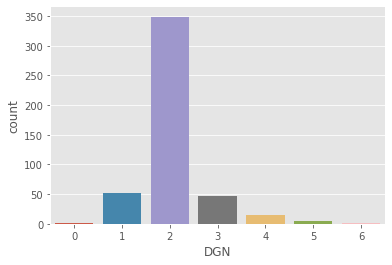

In [590]:
sns.countplot(x='DGN', data=df_encoded)
print(df_encoded['DGN'].value_counts())

2    349
1     52
3     47
0     22
Name: DGN, dtype: int64


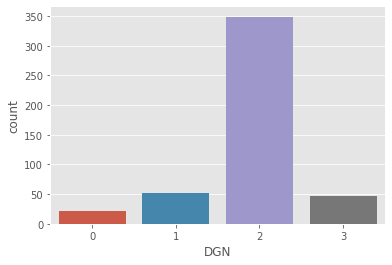

In [591]:
# Изменим строки со значениями целевой функции равными 5, 6, 0  т.к. обучить модель на такой маленькой в разрезе значения функции выборке невозможно
# Заменим значение с малым числом вхождений на одно. 
# В итоге в целевой функции будет три значения, которые будут интерпретироваться как "Black", "White" и "Other: DGN1 + DGN6 + DGN8"
df_encoded.loc[df_encoded['DGN'] == 4 ] = 0
df_encoded.loc[df_encoded['DGN'] == 5 ] = 0 
df_encoded.loc[df_encoded['DGN'] == 6 ] = 0 
# Посмотрим еще раз на распределение признаков
sns.countplot(x='DGN', data=df_encoded)
print(df_encoded['DGN'].value_counts())

In [592]:
# Удалим PRE4 - признак, который сильно коррелирует с PRE5
df_encoded_2 = df_encoded.drop(columns=['PRE4'])

In [593]:
# Выделим целевую функцию в отдельную переменную
y = np.array(df_encoded['DGN'])

In [594]:
# Преобразуем DataFrame в формат для обучения модели (np.array)
df_encoded_3 = df_encoded.drop(columns='DGN')
X = np.array(df_encoded_3)
# Масштабируем признаки
from sklearn.preprocessing import scale
X_norm = scale(X)
X_norm

array([[-0.22016465, -0.25931025,  0.46270596, ..., -0.06537205,
         0.02279637, -0.38982148],
       [ 0.26078136, -0.56963391, -1.38027541, ..., -0.06537205,
        -0.56161955, -0.38982148],
       [-0.33115219, -0.34797415,  0.46270596, ..., -0.06537205,
        -0.04213874, -0.38982148],
       ...,
       [-0.07218126, -0.34797415,  0.46270596, ..., -0.06537205,
        -0.49668445, -0.38982148],
       [-1.07106912, -0.79129367,  0.46270596, ..., -0.06537205,
         1.25656329, -0.38982148],
       [ 1.48164431,  1.29230805, -1.38027541, ..., -0.06537205,
        -0.56161955, -0.38982148]])

In [595]:
# Разобъем выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

Лучшие рейтинги по результатам обучения:
0.49886075949367087
{'C': 0.2}
LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
График оценки точности и стандартного отклонения:


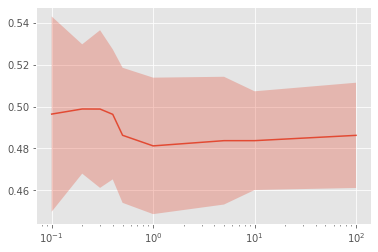

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.20      0.43      0.27         7
           2       0.78      0.38      0.51        55
           3       0.04      0.20      0.07         5

    accuracy                           0.41        71
   macro avg       0.50      0.50      0.46        71
weighted avg       0.68      0.41      0.48        71

Accuracy:
0.4084507042253521


In [596]:
# Проведем создание, обучение и тестирование модели взвешенной логистической регрессии
lg_balanced_model(X_train, y_train, X_test, y_test)

In [597]:
# Проведем создание, обучение и тестирование модели на knn с RandomOverSampler
knn_smote_model(X_train, y_train, X_test, y_test)

{'n_neighbors': 2} 0.909877389109268
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.15      0.29      0.20         7
           2       0.82      0.65      0.73        55
           3       0.00      0.00      0.00         5

    accuracy                           0.59        71
   macro avg       0.49      0.49      0.48        71
weighted avg       0.71      0.59      0.64        71

Accuracy:
0.5915492957746479


Лучшие рейтинги по результатам обучения:
0.8282473855030652
{'C': 100}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
График оценки точности и стандартного отклонения:


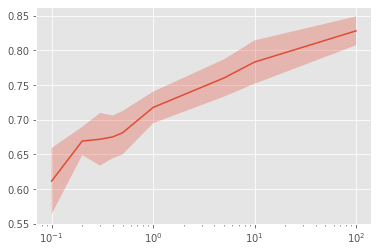

Classification_report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.20      0.43      0.27         7
           2       0.91      0.53      0.67        55
           3       0.16      0.60      0.25         5

    accuracy                           0.55        71
   macro avg       0.52      0.64      0.52        71
weighted avg       0.78      0.55      0.61        71

Accuracy:
0.5492957746478874


In [598]:
# Проведем создание, обучение и тестирование модели на SVC c kernel = 'poly' (полиноминальные коэффициенты)
svc_model(X_train, y_train, X_test, y_test)